# ++pyqsar tutorial for multiple linear regression model++

# Sinyoung Kim

crong24601@gmail.com

Release : 27 December 2017

# Data Load

In [1]:
import pandas as pd
csv_file_name = "qsar_input_file.csv"
sample_data = pd.read_csv(csv_file_name,sep=",")

X_data = sample_data.iloc[:,1:-1]
y_data = sample_data.iloc[:,-1:]

In [2]:
#X_data   # Total dataframe
X_data.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,2.8332,8.027022,15.5429,6.481000,0,0,5,5,0,...,29.582709,8.500000,1.700000,9.000000,0.000000,0.0,16.0,0.0,2.791,20.0
1,0,0.6494,0.421720,13.7114,7.993379,0,0,9,6,3,...,11.112622,10.465990,1.744332,9.237437,2.332107,0.0,28.0,3.0,0.926,24.0
2,1,0.8583,0.736679,13.6539,7.461793,0,0,8,7,1,...,14.249108,12.293055,1.756151,11.587713,4.654701,0.0,42.0,6.0,0.619,30.0
3,0,2.7863,7.763468,27.3736,11.731000,0,0,8,8,0,...,23.237721,14.062500,1.757812,13.875000,0.000000,0.0,58.0,9.0,3.471,38.0
4,0,0.6467,0.418221,17.4897,10.977172,0,0,12,8,4,...,11.001652,14.271680,1.783960,11.777389,2.362609,0.0,62.0,9.0,1.291,34.0


In [3]:
X_data.shape

(56, 1444)

In [4]:
#y_data   # Total dataframe
y_data.head()

,end_point
0,2.592
1,4.538
2,3.927
3,2.858
4,4.186


In [5]:
y_data.shape

(56, 1)

# Hello pyqsar!

In [6]:
import pyqsar
from pyqsar import data_tools as dt

# Remove empty feature

In [7]:
X_data.shape

(56, 1444)

In [8]:
X_data = dt.rm_empty_feature(X_data)

In [9]:
X_data.shape

(56, 1018)

# Remove NaN

In [10]:
X_data.shape

(56, 1018)

In [11]:
X_data = dt.rmNaN(X_data)

In [12]:
X_data.shape

(56, 981)

# Widget for data

In [13]:
dt.SearchFeature(X_data)

Text(value=u'')

Button(description=u'Search', style=ButtonStyle())

<pyqsar.data_tools.SearchFeature instance at 0x7fce5dcdbdd0>

U2VsZWN0TXVsdGlwbGUoZGVzY3JpcHRpb249dSdTZWxlY3RlZCBGZWF0dXJlczonLCBvcHRpb25zPSgnbkFjaWQnLCAnQUxvZ1AnLCAnQUxvZ3AyJywgJ0FNUicsICdhcG9sJywgJ25BdG9tJyzigKY=


/share/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Button(description=u'Get scatter matrix', style=ButtonStyle())

<pyqsar.data_tools.ScatterMatrix instance at 0x7fce5db3b5f0>

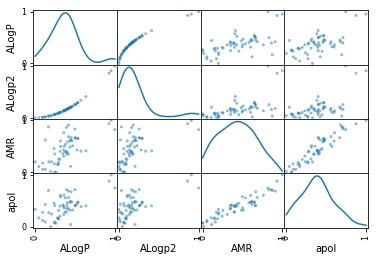

In [14]:
%matplotlib inline
dt.ScatterMatrix(X_data)

# Data scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
header = list(X_data.columns.values)
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data = pd.DataFrame(X_data_scaled, columns=header)

In [16]:
X_data.head()

,nAcid,ALogP,ALogp2,AMR,apol,nAtom,nHeavyAtom,nH,nC,nN,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0.0,0.443862,0.202583,0.112285,0.038257,0.000000,0.000000,0.000000,0.000000,0.0,...,0.818155,0.000000,0.000000,0.053817,0.000000,0.0,0.000000,0.00,0.302044,0.000000
1,0.0,0.092842,0.010520,0.054573,0.117191,0.181818,0.045455,0.500000,0.142857,0.0,...,0.094669,0.047890,0.192789,0.059917,0.287180,0.0,0.007407,0.05,0.042692,0.030769
2,1.0,0.126421,0.018474,0.052761,0.089446,0.136364,0.090909,0.166667,0.142857,0.0,...,0.217527,0.092396,0.244187,0.120301,0.573189,0.0,0.016049,0.10,0.000000,0.076923
3,0.0,0.436324,0.195927,0.485077,0.312265,0.136364,0.136364,0.000000,0.142857,0.0,...,0.569617,0.135498,0.251413,0.179067,0.000000,0.0,0.025926,0.15,0.396607,0.138462
4,0.0,0.092408,0.010431,0.173629,0.272921,0.318182,0.136364,0.666667,0.285714,0.0,...,0.090322,0.140594,0.365123,0.125174,0.290937,0.0,0.028395,0.15,0.093450,0.107692


# Feature clustering for feature selection

In [17]:
from pyqsar import clustering as cl
# calculate cophenetic correlation coefficient 
cl.cophenetic(X_data)

average linkage cophenet: 0.8207361898865558
complete linkage cophenet: 0.7880046753103084
single linkage cophenet: 0.3516479979353866


In [18]:
# clustering
clust = cl.FeatureCluster(X_data, 'average', 3)
clust_info = clust.set_cluster()


Cluster 1 ['ETA_Shape_X', 'JGT'] 
Cluster 2 ['MLogP'] 
Cluster 3 ['ATSC1e', 'ATSC1i'] 
Cluster 4 ['ATSC1p'] 
Cluster 5 ['MLFER_E'] 
Cluster 6 ['ATSC1c'] 
Cluster 7 ['nssO'] 
Cluster 8 ['nAtomLC'] 
Cluster 9 ['nRotB'] 
Cluster 10 ['MATS8s', 'MATS8p', 'MATS8e', 'ATSC7c', 'ATSC8v', 'ATSC8s', 'ATSC8p', 'ATSC8e', 'ATSC8c', 'ATSC8m', 'ATSC8i', 'MDEO-22', 'MATS8v', 'MATS8c', 'AATSC8s', 'AATSC8p', 'AATSC8v', 'AATSC8c', 'AATSC8e', 'AATSC8i', 'MATS8m', 'AATSC8m', 'MATS8i'] 
Cluster 11 ['GGI9', 'piPC10', 'JGI9', 'MPC10'] 
Cluster 12 ['LipinskiFailures'] 
Cluster 13 ['ATS7s', 'ATS7p', 'ATS7v', 'ATS7i', 'ATS7m', 'ATS7e', 'GGI7', 'GGI6', 'JGI6', 'JGI7', 'JGI8', 'ATS8i', 'ATS8m', 'ATS8e', 'ATS8s', 'ATS8p', 'ATS8v', 'GATS8m', 'GATS8i', 'GATS8e', 'GATS8c', 'GATS8v', 'GATS8p', 'GATS8s', 'AATS8e', 'AATS8i', 'GGI8', 'AATS8m', 'AATS8s', 'AATS8p', 'AATS8v', 'GATS7p', 'AATS7m', 'AATS7v', 'MPC8', 'AATS7s', 'MPC9', 'piPC9'] 
Cluster 14 ['MPC7'] 
Cluster 15 ['piPC8'] 
Cluster 16 ['GATS7c', 'GATS7i', 'AATS7i', 

Cluster 158 ['minHBint4', 'nHBint4', 'maxHBint4', 'SHBint4'] 
Cluster 159 ['BCUTc-1l'] 
Cluster 160 ['MATS5c', 'AATSC5c'] 
Cluster 161 ['AATSC5i', 'MATS5i', 'ATSC5i'] 
Cluster 162 ['AATSC5m', 'AATSC5s', 'AATSC5e', 'MATS5e', 'MATS5m', 'MATS5s'] 
Cluster 163 ['ATSC5e', 'ATSC5s'] 
Cluster 164 ['ATSC5m'] 
Cluster 165 ['CIC3', 'IC1'] 
Cluster 166 ['MATS2m', 'GATS2m'] 
Cluster 167 ['nHBDon_Lipinski', 'ETA_dEpsilon_D'] 
Cluster 168 ['SHsNH2', 'maxHsNH2', 'nHsNH2', 'SsNH2', 'nsNH2', 'minHsNH2', 'maxsNH2', 'minsNH2'] 
Cluster 169 ['nBase'] 
Cluster 170 ['minssCH2', 'SssCH2'] 
Cluster 171 ['nssCH2'] 
Cluster 172 ['AATSC0e'] 
Cluster 173 ['VE1_D'] 
Cluster 174 ['AATSC1v'] 
Cluster 175 ['SpMin5_Bhv', 'SpMin5_Bhp'] 
Cluster 176 ['SpMin3_Bhe', 'SpMin3_Bhm', 'SpMin3_Bhi'] 
Cluster 177 ['GATS4s', 'GATS4m', 'GATS4e'] 
Cluster 178 ['MATS3c', 'AATSC3c'] 
Cluster 179 ['GATS3i'] 
Cluster 180 ['AVP-4'] 
Cluster 181 ['MATS7c', 'AATSC7c'] 
Cluster 182 ['StsC', 'maxtN', 'StN', 'ntN', 'mintN', 'MDEN-11', 'ntsC'

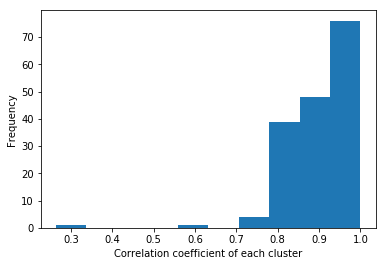

In [19]:
clust.cluster_dist()

# Feature selection using single core

In [36]:
from pyqsar import feature_selection_single as fss
select = fss.selection(X_data, y_data,
                       clust_info,
                       model='regression',
                       learning=10000,
                       bank=200,
                       component=4)

Start time :  12:55:03
Regression
1000 => 12:57:48 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
2000 => 13:00:33 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
3000 => 13:03:20 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
4000 => 13:06:07 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
5000 => 13:08:53 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
6000 => 13:11:39 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
7000 => 13:14:26 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
8000 => 13:17:12 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
9000 => 13:19:59 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
10000 => 13:22:45 [0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
[0.819406826332812, ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']]
Model's cluster info [67, 254, 9, 190]
Finish time :  13:22:45


In [37]:
select

['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']

# Feature selection using multi core

In [38]:
from pyqsar import feature_selection_multi as fsm
select_m = fsm.MultiSelection(X_data, y_data,
                              clust_info,
                              model='regression',
                              learning=10000,
                              bank=200,
                              component=4)

Regression


In [39]:
select_m.run(n_core=4, run_job=3) #run_job : Number of times to perform the selection function

[0.8242128178032906, ['MLFER_E', 'XLogP', 'nssssC', 'nwHBd']]
[0.8242128178032906, ['MLFER_E', 'XLogP', 'nssssC', 'nwHBd']]
[0.8242128178032906, ['MLFER_E', 'XLogP', 'nssssC', 'nwHBd']]


['MLFER_E', 'XLogP', 'nssssC', 'nwHBd']

# Export model

In [40]:
from pyqsar import export_model as em
feature_set = select
mymodel = em.ModelExport(X_data,y_data, feature_set)

In [41]:
mymodel.features_table()

,ETA_Eta_L,TopoPSA,nRotB,nsssCH,end_point
0,0.076912,0.000000,0.000,0.000000,2.592
1,0.075974,0.425179,0.125,0.000000,4.538
2,0.051074,0.783943,0.125,0.000000,3.927
3,0.214634,0.000000,0.125,0.000000,2.858
4,0.191665,0.425179,0.250,0.333333,4.186
5,0.025441,0.000000,0.000,0.000000,1.589
6,0.197563,0.000000,0.125,0.000000,3.200
7,0.242089,0.546868,0.125,0.000000,5.368
8,0.251004,0.906683,0.250,0.000000,5.337
9,0.260168,0.000000,0.125,0.000000,3.956


,ETA_Eta_L,TopoPSA,nRotB,nsssCH,end_point
ETA_Eta_L,1.000000,0.076283,0.742582,-0.108054,0.266855
TopoPSA,0.076283,1.000000,0.365734,-0.250235,0.611937
nRotB,0.742582,0.365734,1.000000,0.021302,0.075124
nsssCH,-0.108054,-0.250235,0.021302,1.000000,-0.655931
end_point,0.266855,0.611937,0.075124,-0.655931,1.000000


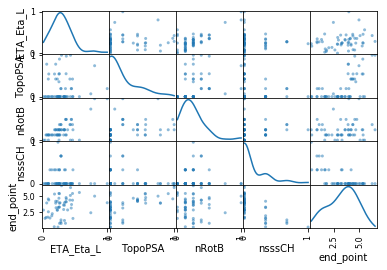

In [42]:
mymodel.model_corr()

In [43]:
mymodel.mlr()

Model features:  ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']
Coefficients:  [[ 5.56280362  3.45694225 -4.84833043 -2.70201862]]
Intercept:  [2.4473551]
RMSE: 0.647375
R^2: 0.819407


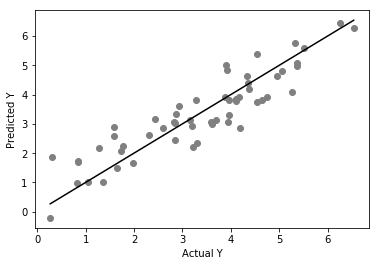

In [44]:
mymodel.train_plot()

In [45]:
mymodel.train_plot_inter()

Loading BokehJS ...

# Cross validation

R^2CV mean: 0.820142
Q^2CV mean: 0.797073
RMSE CV : 0.666974
Features set = ['ETA_Eta_L', 'TopoPSA', 'nRotB', 'nsssCH']
Model coeff =  [[ 5.36312114  3.42115548 -4.83323703 -2.6520258 ]]
Model intercept =  [2.52655122]


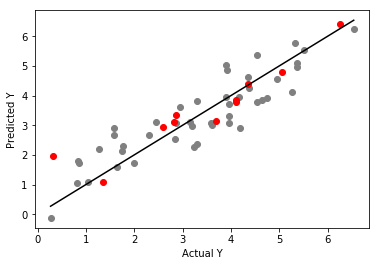

In [46]:
from pyqsar import cross_validation as cv
cv.k_fold(X_data, y_data, feature_set, k=5, run=100)

# Draw molecule

In [47]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from pyqsar import draw_mol as dm

def Get_Index_Mol(ms, index_list):
    temp_ms = []
    for i in index_list:
        temp_ms.append(ms[i])
    return temp_ms

sdf_file_name = "2D_Compouds.sdf"
suppl = Chem.SDMolSupplier(sdf_file_name)
ms = [x for x in suppl if x is not None]
for m in ms:
    tmp=AllChem.Compute2DCoords(m)

In [48]:
index = [0,5,10,15,20,25,30,35,40,45,50]
mols = Get_Index_Mol(ms, index)
img=Draw.MolsToGridImage(mols,
                         molsPerRow=3,
                         subImgSize=(300,300),
                         legends=[x.GetProp("_Name") for x in mols] )

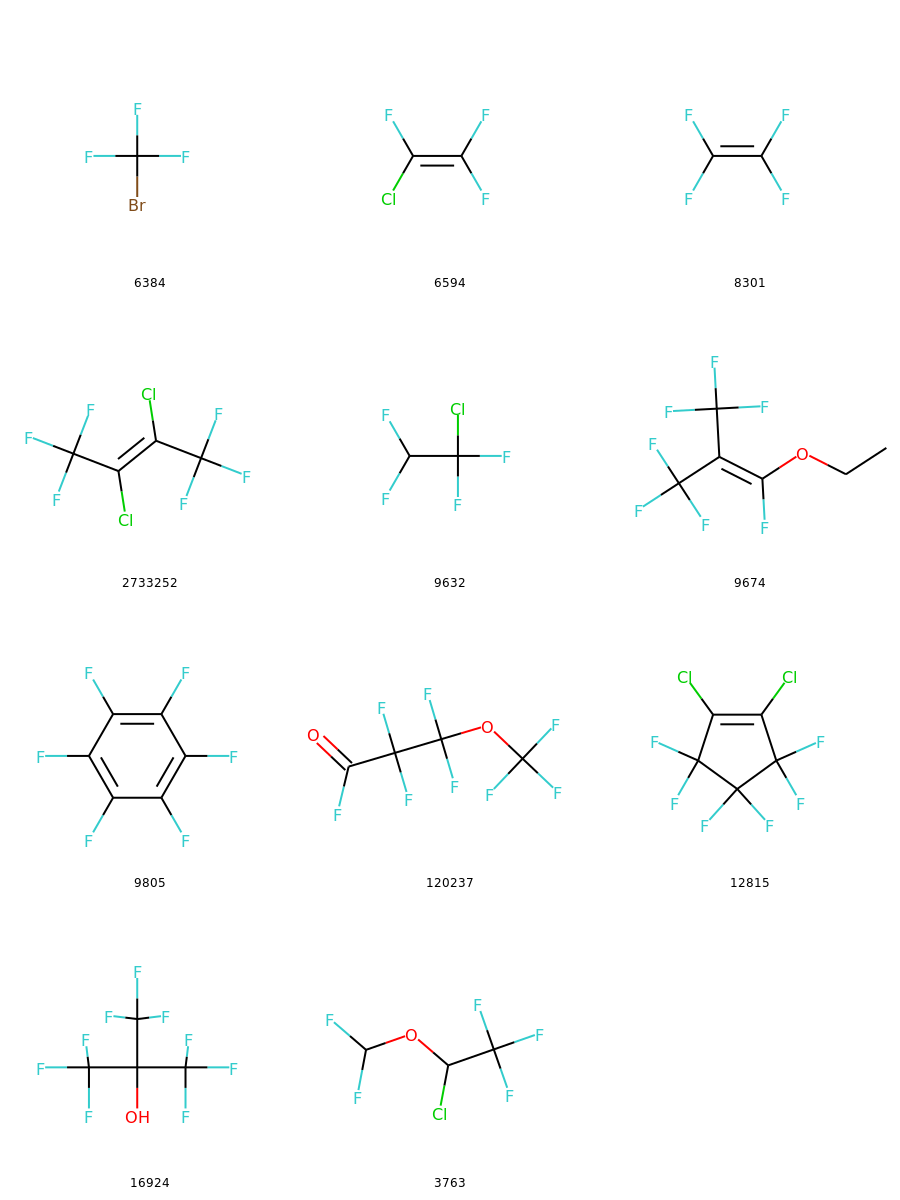

In [49]:
img

In [50]:
draw = dm.DrawMols(sdf_file_name)
commonsub=draw.common_substr(index=index)

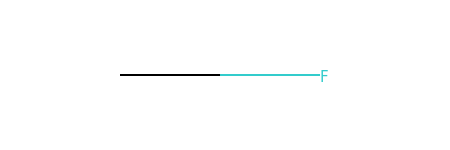

In [51]:
draw.show_substr(commonsub)